In [1]:
import scipy

In [17]:
import numpy as np

In [2]:
import scipy.integrate

 $\int_{a}^{b} x^2 dx$

In [6]:
f=lambda x: exp(-x**2)


In [8]:
 f = lambda x : exp(-x**2)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

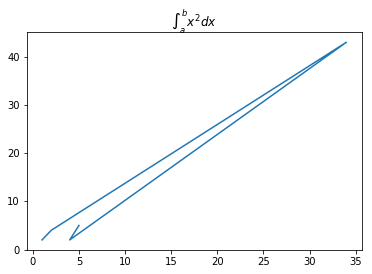

In [13]:
x=[1,2,34,4,5]
y=[2,4,43,2,5]
plt.plot(x,y)
plt.title("$\int_{a}^{b} x^2 dx$")
plt.show()

In [15]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import netCDF4

In [16]:
m=Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')

C:\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
C:\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


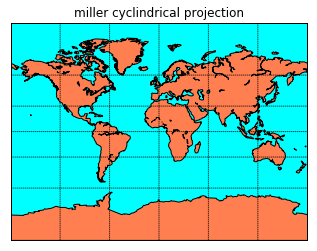

In [18]:
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90,90,30))
m.drawmeridians(np.arange(-180,180,60))
m.drawmapboundary(fill_color='aqua')
plt.title("miller cyclindrical projection")
plt.show()

In [19]:
np.arange(-90,90,30)

array([-90, -60, -30,   0,  30,  60])

In [20]:
np.arange(-180,180,60)

array([-180, -120,  -60,    0,   60,  120])

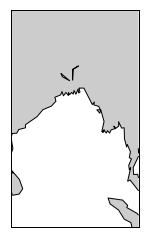

In [27]:
m=Basemap(projection='cyl', llcrnrlat=1,urcrnrlat=35,llcrnrlon=80,urcrnrlon=100,resolution='c')
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents()
plt.figure(figsize=(30,25))
plt.show()

ImportError: warpimage method requires PIL (http://www.pythonware.com/products/pil)

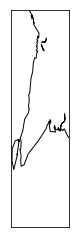

In [37]:
m=Basemap(projection='cass',llcrnrlat=1,urcrnrlat=35,llcrnrlon=80,urcrnrlon=100,lat_0=70,lon_0=0)
m.drawcoastlines()
m.bluemarble()
plt.show()

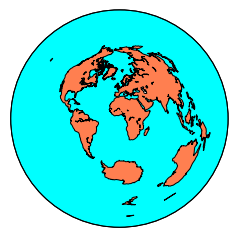

In [31]:
m=Basemap(projection='aeqd',lat_0=0,lon_0=0)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral')
plt.figure(figsize=(30,25))
plt.show()

In [38]:
plt.figure()
nc ='rtofs_glo_3dz_n048_daily_3ztio.nc'
# In this example we will extract the surface temperature field from the model.
# Remember that indexing in Python starts at zero.
file = netCDF4.Dataset(nc)
lat  = file.variables['Latitude'][:]
lon  = file.variables['Longitude'][:]
data = file.variables['temperature'][0,0,:,:]
file.close()

In [41]:
#There is a quirk to the global NetCDF files that isn't in the NOMADS data, namely that there are junk values of longitude (lon>500) in the rightmost column of the longitude array (they are ignored by the model itself). So we have to work around them a little with NaN substitution.
lon = np.where(np.greater_equal(lon,500),np.nan,lon)
 
#Plot the field using Basemap. Start with setting the map projection using the limits of the lat/lon data itself
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=np.nanmin(lon),urcrnrlon=np.nanmax(lon),llcrnrlat=lat.min(),urcrnrlat=lat.max(),resolution='c')
#Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)

In [42]:
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
#Add a colorbar and title, and then show the plot.
plt.colorbar(cs)
plt.title('Global RTOFS SST from NetCDF')
plt.show()

C:\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


MemoryError: 

In [ ]:

 

 
#Plot the field using the fast pcolormesh routine and set the colormap to jet.
